In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import sklearn.metrics as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [168]:
# Collect and clean the data
original_data = pd.read_csv('google-stock-dataset.csv')
original_data.set_index("Date", inplace=True)
original_data

,Unnamed: 0,Price,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2013-04-15,0,19.67,19.94,19.44,19.57,98025876,19.57
2013-04-16,1,19.68,19.92,19.62,19.85,69610320,19.85
2013-04-17,2,19.69,19.79,19.47,19.58,81398520,19.58
2013-04-18,3,19.65,19.66,19.05,19.17,132767100,19.17
2013-04-19,4,19.25,20.11,19.18,20.02,231895872,20.02
...,...,...,...,...,...,...,...
2023-03-27,2505,104.62,104.76,101.93,102.46,31120900,102.46
2023-03-28,2506,102.44,102.45,99.74,101.03,32057900,101.03
2023-03-29,2507,102.28,102.49,100.65,101.39,28779600,101.39


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '2021-04-08'),
  Text(0.0, 0, '2013-04-15'),
  Text(500.0, 0, '2015-04-09'),
  Text(1000.0, 0, '2017-04-03'),
  Text(1500.0, 0, '2019-03-29'),
  Text(2000.0, 0, '2021-03-24'),
  Text(2500.0, 0, '2023-03-20'),
  Text(3000.0, 0, '')])

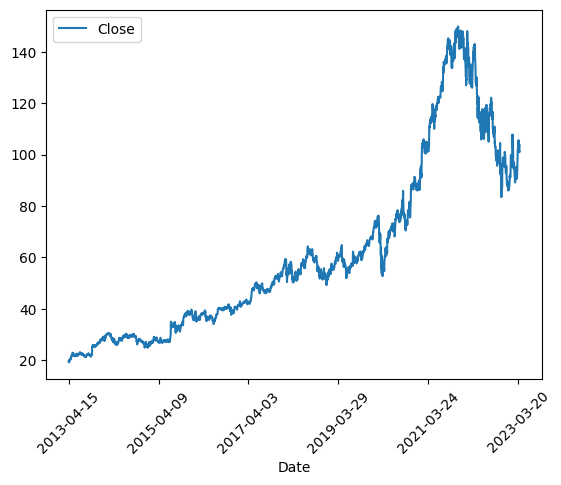

In [169]:
# Show the data visually
original_data.plot(y="Close")
plt.xticks(rotation=45)

In [170]:
#### PREPROCESSING ####
original_data = original_data.dropna() # Drop missing data

x_data = original_data.iloc[:, original_data.columns != 'Volume'].values # x_data.shape = (2510, 6)
y_data = original_data.iloc[:, 4].values # y_data.shape = (2510, )

# Divide into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.9, random_state=0)
print(y_test)
# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

[ 30.09  53.12  47.38 ...  88.49  29.11 113.53]


In [171]:
# Create the model
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

In [172]:
# grid_rf = {
# 'n_estimators': [20, 50, 100, 500, 1000],  
# 'max_depth': np.arange(1, 15, 1),  
# 'min_samples_split': [2, 10, 9], 
# 'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
# 'bootstrap': [True, False], 
# 'random_state': [1, 2, 30, 42]
# }
# rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
# rscv_fit = rscv.fit(x_train, y_train)
# best_parameters = rscv_fit.best_params_
# print(best_parameters)

In [173]:
# Train the model
model.fit(x_train_scaled, y_train) # Training the model

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [174]:
# Test the model
x_test_scaled = scaler.transform(x_test)
y_predict = model.predict(x_test_scaled)
print('The model score is:', model.score(x_train, y_train))

The model score is: -4.900661358227913


In [175]:
# Make the prediction
# x-axis
x_dates = []
predicted_dates = original_data.index[x_train.shape[0]:]
for d in predicted_dates:
    x_dates.append(mdates.date2num(dt.datetime.strptime(d, '%Y-%m-%d')))

# y-axis
print('Actual value is:')
print(y_test)
print('The model predicts the last row or day to be:')
print(y_predict)

Actual value is:
[ 30.09  53.12  47.38 ...  88.49  29.11 113.53]
The model predicts the last row or day to be:
[ 30.109935  53.83255   47.26866  ...  88.3826    29.07432  113.71794 ]


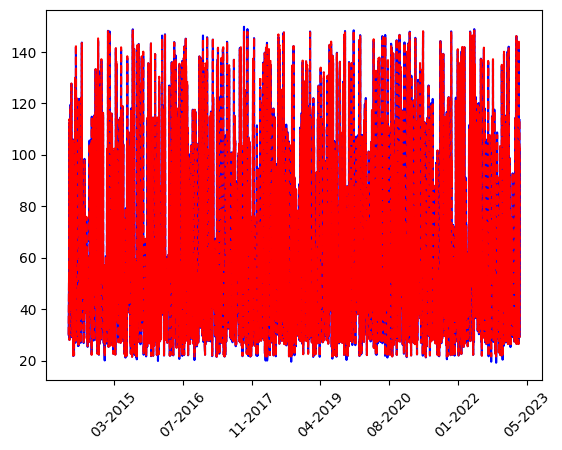

In [176]:
# Plot the test predictions
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=45)

plt.plot(x_dates, y_test, color='blue')
plt.plot(x_dates, y_predict, color='red', linestyle='--')
plt.show()

In [177]:
# Link: https://stats.stackexchange.com/questions/235189/random-forest-regression-not-predicting-higher-than-training-data

In [178]:
# Calculate accuracy
errors = list()
for i in range(len(actual)):
    # calculate error
    err = (actual.values[i] - prediction[i])**2
    # store error
    errors.append(err)
# plot errors
plt.plot(errors)
plt.xlabel('Predicted value')
plt.ylabel('Mean squared error')
plt.show()

NameError: name 'actual' is not defined

In [ ]:
original_data.index[:x_test.shape[0]]

In [ ]:
x_train